### Load data and show any sample

In [1]:
import numpy as np
import pandas as pd

# df = pd.read_csv('sample/Data_Entry_2017.csv')
df = pd.read_csv('D:/Minor/minor chester/sample_labels.csv')

In [2]:
df.head()

,Image_Index,Finding_Labels,Follow_Up_#,Patient_ID,Patient_Age,Patient_Gender,View_Position
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA
1,00000001_001.png,Cardiomegaly,1,1,058Y,M,PA
2,00000001_002.png,Cardiomegaly,2,1,058Y,M,PA
3,00000002_000.png,No Finding,0,2,081Y,M,PA
4,00000003_000.png,Hernia,0,3,081Y,F,PA


In the meantime, we can see that the data is not being processed yet, so we will process it before further analysis

### Preprocessing

We will separate diseases from 14 diseases and no diseases. Next, transfer the age data to the correct numeric format

In [3]:
diseases = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
#split diseases
for disease in diseases :
    df[disease] = df['Finding_Labels'].apply(lambda x: 1 if disease in x else 0).astype(int)

df['No_Finding']=df['Finding_Labels'].apply(lambda x: 1 if 'No_Finding' in x else 0)
df['Finding']=df['Finding_Labels'].apply(lambda x: 0 if 'No_Finding' in x else 1)

In [4]:
#remove last character in Age
df['Age']=df['Patient_Age'].apply(lambda x: x[:-1]).astype(int)
df['Age_Type']=df['Patient_Age'].apply(lambda x: x[-1:])

np.unique(df['Age_Type'], return_counts=True)

(array(['Y'], dtype=object), array([4999]))

Seeing that there is an age case is calculated in Day, and one case is in Month, so it's all in Year

In [5]:
df.loc[df['Age_Type']=='M',['Age']] = df[df['Age_Type']=='M']['Age'].apply(lambda x: round(x/12.)).astype(int)
df.loc[df['Age_Type']=='D',['Age']] = df[df['Age_Type']=='D']['Age'].apply(lambda x: round(x/365.)).astype(int)

In [6]:
df.describe()

,Follow_Up_#,Patient_ID,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No_Finding,Finding,Age
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.0,4999.0,4999.000000
mean,7.153431,664.016003,0.034607,0.018004,0.056211,0.004801,0.023005,0.018004,0.092018,0.013203,0.016003,0.011802,0.032006,0.098020,0.027606,0.003401,0.0,1.0,51.809362
std,11.211108,395.466319,0.182800,0.132977,0.230352,0.069129,0.149933,0.132977,0.289081,0.114153,0.125500,0.108006,0.176035,0.297371,0.163856,0.058222,0.0,0.0,17.015137
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,9.000000
25%,0.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,40.000000
50%,3.000000,643.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,54.000000
75%,8.000000,1021.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,64.000000
max,66.000000,1335.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,94.000000


We see something special in the Age field, which is max 411, no one living up to 411 years is recorded, this is certainly a statistical error in the process.

In [7]:
df['Age'].sort_values(ascending=False).head(20)

576     94.0
578     94.0
577     94.0
3761    93.0
3762    93.0
588     92.0
586     92.0
231     92.0
583     92.0
584     92.0
585     91.0
587     91.0
3973    91.0
581     91.0
230     91.0
582     90.0
580     90.0
3972    89.0
579     89.0
2517    88.0
Name: Age, dtype: float64

In [8]:
df = df.drop(df['Age'].sort_values(ascending=False).head(1).index)

### Number of each diseases by patient gender

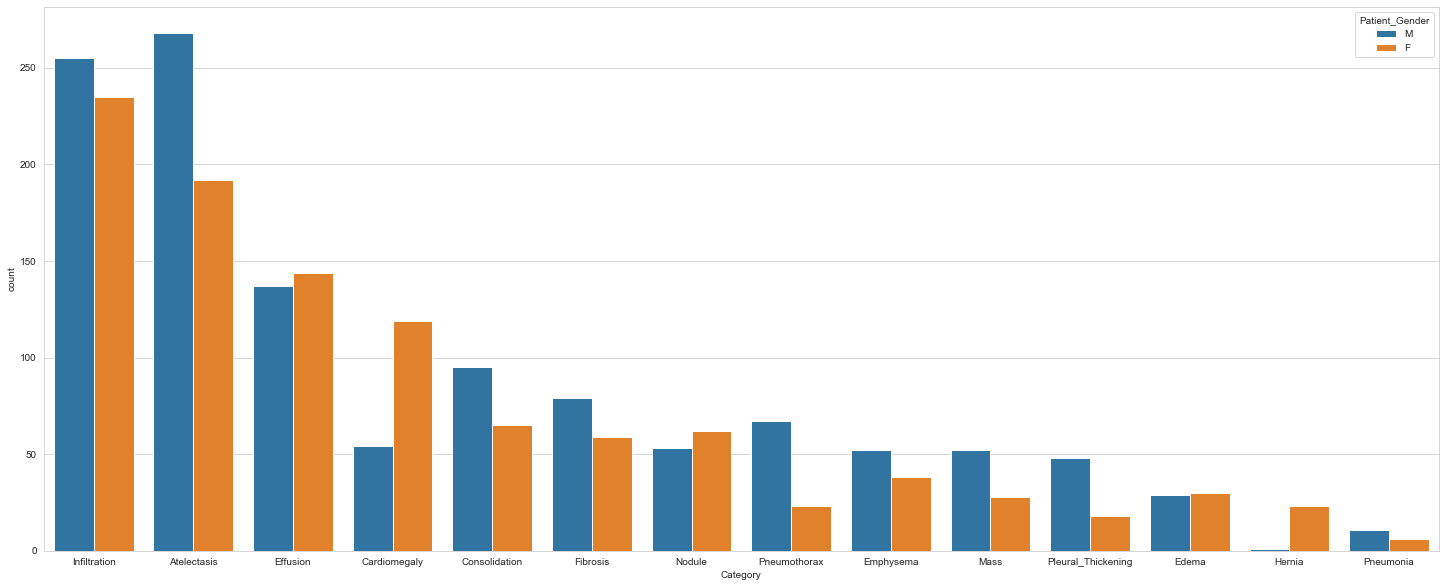

In [9]:
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
ax = plt.subplot()

data = pd.melt(df, id_vars=['Patient_Gender'], value_vars = list(diseases + ['No_Finding']), var_name = 'Category', value_name = 'Count')
data = data.loc[data.Count>0]

sns.countplot(x='Category',hue='Patient_Gender',data=data, ax=ax, order = data['Category'].value_counts().index)

### Distribution of Patient Gender and Finding diseases

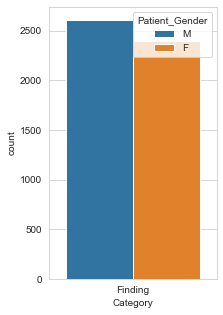

In [10]:
plt.figure(figsize=(3,5))
ax = plt.subplot()

data = pd.melt(df, id_vars=['Patient_Gender'], value_vars = list(['Finding', 'No_Finding']), var_name = 'Category', value_name = 'Count')
data = data.loc[data.Count>0]

sns.countplot(x='Category',hue='Patient_Gender',data=data, ax=ax, order = data['Category'].value_counts().index)

### Distribution of Patient Gender and View Position

c:\users\arpit\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


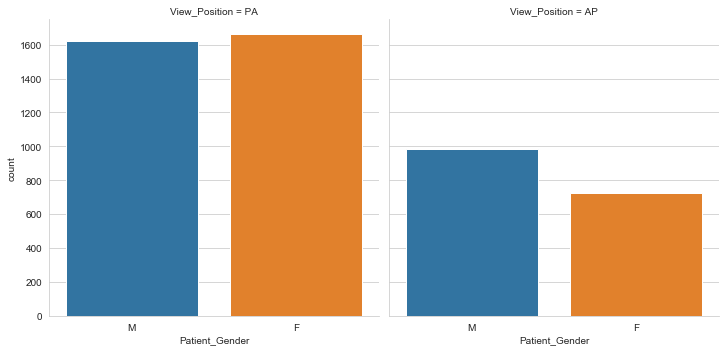

In [11]:
sns.factorplot(x="Patient_Gender", col="View_Position",data=df, kind="count");

### Different images of view position in same patient

In [12]:
df[df['Patient_ID'] == 61]

,Image_Index,Finding_Labels,Follow_Up_#,Patient_ID,Patient_Age,Patient_Gender,View_Position,Cardiomegaly,Emphysema,Effusion,...,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No_Finding,Finding,Age,Age_Type
264,00000061_000.png,Infiltration,0,61,077Y,M,PA,0,0,0,...,0,0,0,1,0,0,0,1,77.0,Y
265,00000061_001.png,Mass,1,61,077Y,M,PA,0,0,0,...,1,0,0,0,0,0,0,1,77.0,Y
266,00000061_002.png,Effusion,2,61,077Y,M,PA,0,0,1,...,0,0,0,0,0,0,0,1,77.0,Y
267,00000061_003.png,Effusion,3,61,077Y,M,PA,0,0,1,...,0,0,0,0,0,0,0,1,77.0,Y
268,00000061_004.png,Atelectasis,4,61,077Y,M,AP,0,0,0,...,0,0,0,0,0,0,0,1,77.0,Y
269,00000061_005.png,Effusion,5,61,077Y,M,AP,0,0,1,...,0,0,0,0,0,0,0,1,77.0,Y
270,00000061_006.png,Effusion,6,61,077Y,M,AP,0,0,1,...,0,0,0,0,0,0,0,1,77.0,Y
271,00000061_007.png,Effusion,7,61,078Y,M,AP,0,0,1,...,0,0,0,0,0,0,0,1,78.0,Y
272,00000061_008.png,Effusion,8,61,078Y,M,AP,0,0,1,...,0,0,0,0,0,0,0,1,78.0,Y
273,00000061_009.png,Effusion,9,61,077Y,M,AP,0,0,1,...,0,0,0,0,0,0,0,1,77.0,Y


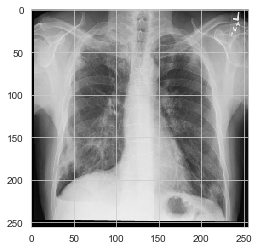

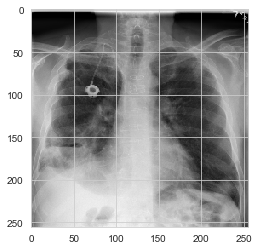

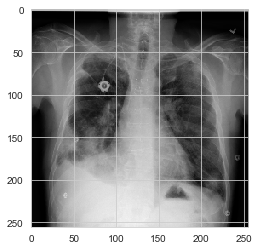

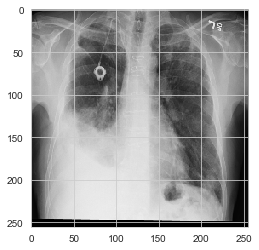

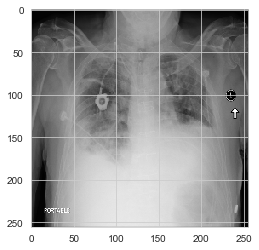

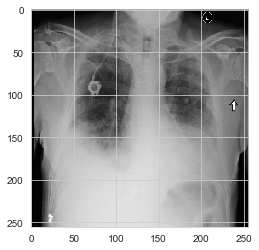

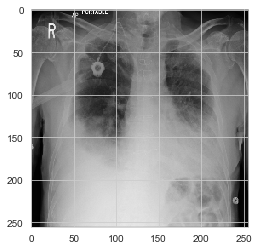

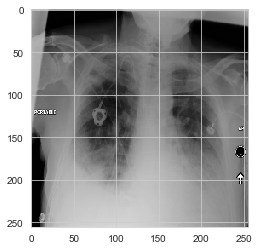

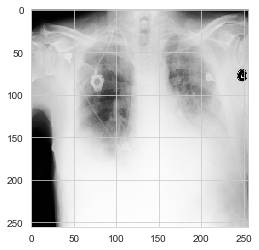

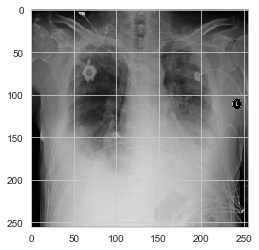

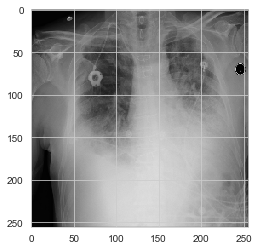

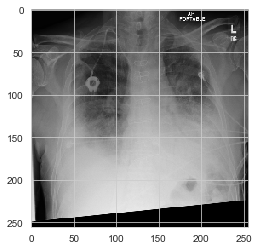

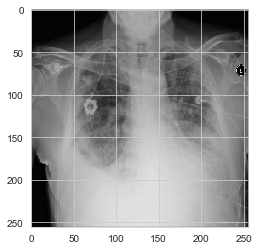

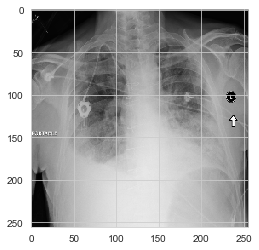

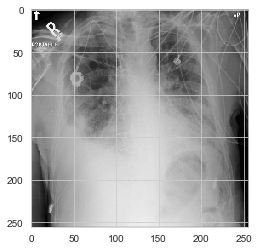

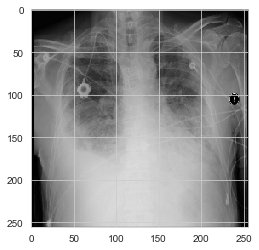

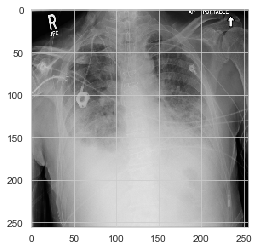

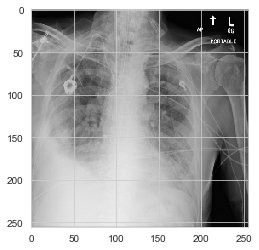

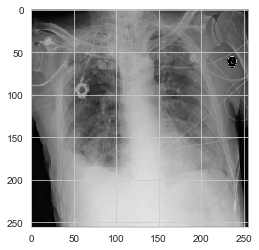

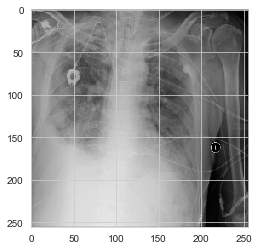

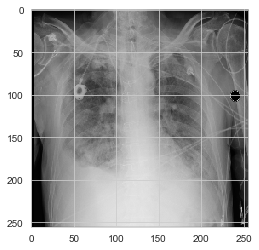

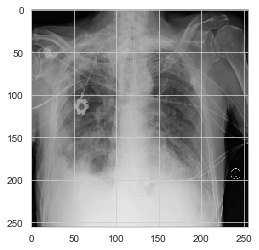

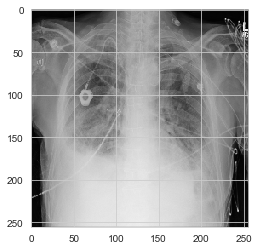

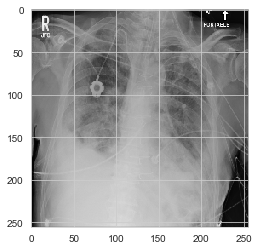

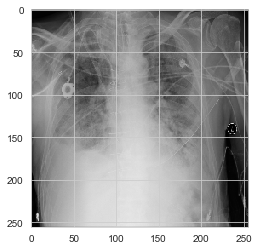

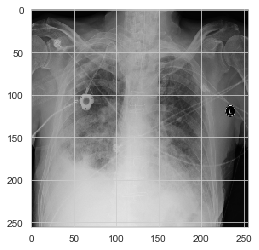

In [14]:
import matplotlib.pyplot as plt 
import cv2
%matplotlib inline

def show_image(img_path):
    image = cv2.imread(img_path)
    img = cv2.resize(image, (256, 256))
    plt.imshow(img)
    plt.show()

for img_path in df[df['Patient_ID'] == 61]['Image_Index'].tolist():
    show_image('D:/Minor/minor chester/images/' + img_path)

### Age distribution

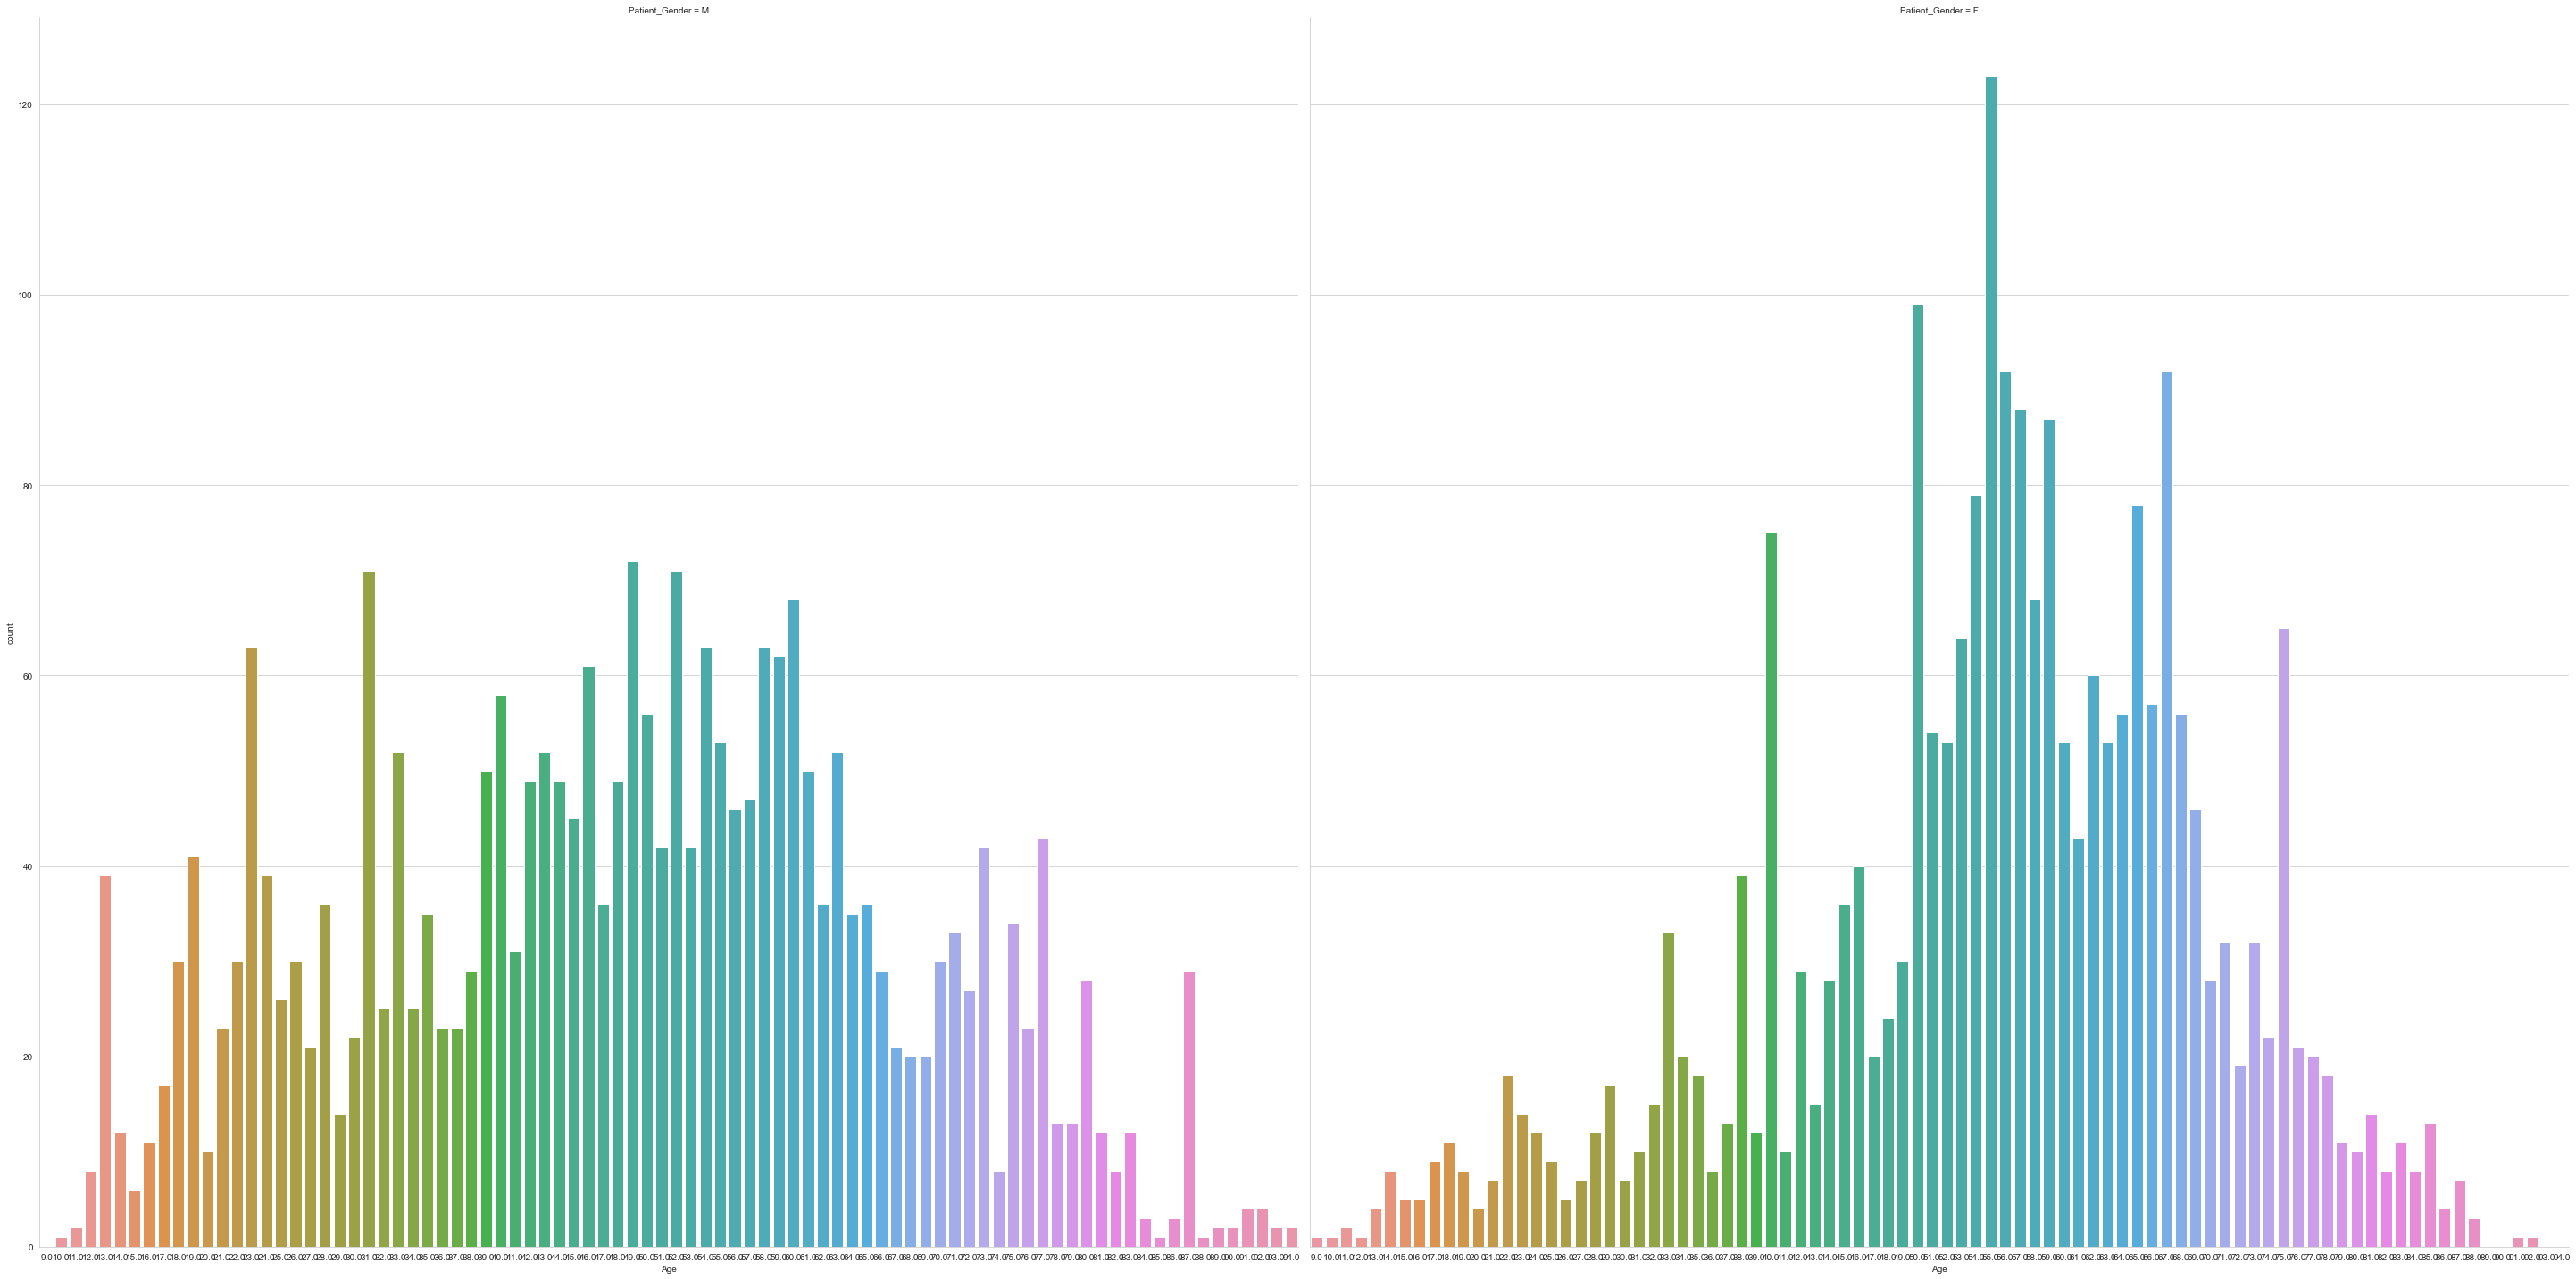

In [17]:
sns.factorplot(x="Age", col="Patient_Gender",data=df, kind="count",size=20);

### Distribution of Age for each disease

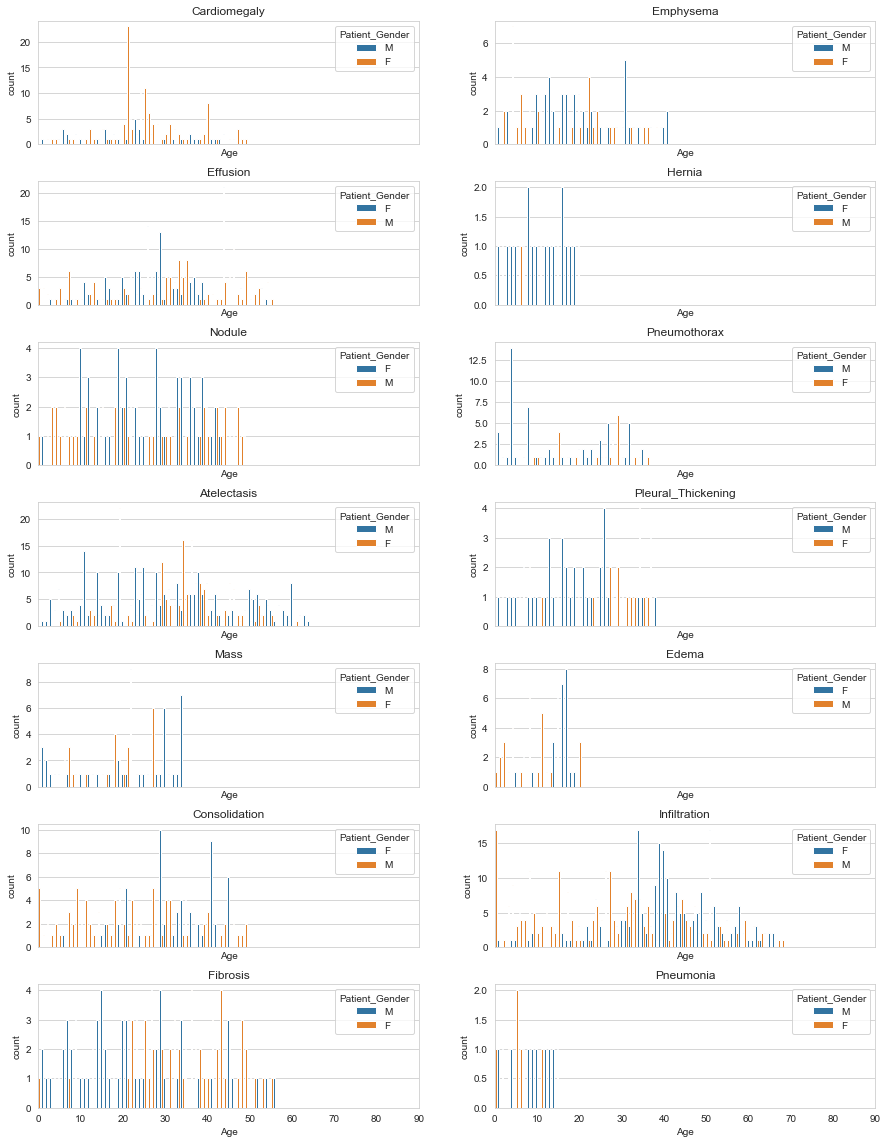

In [15]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,100,10)
for pathology in diseases :
    g=sns.countplot(x='Age', hue="Patient_Gender",data=df[df['Finding_Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)